In [4]:
import numpy as np
import matplotlib.pyplot as plt
import re
from scipy import interpolate


In [5]:
def createInputFileDictionary(path):
    inputFile = open(path,'r')
    
    inputFileDict = {}
    
    inputLines = inputFile.readlines()
    
    variableValue = ''
    variableName = ''

    sectionName = ''

    for i in range(len(inputLines)):
        line = inputLines[i].strip()
        if len(line) == 0:
            continue
        if line[0] == '!' or line[1] == '!':
            continue
        if line[0] == '&':# and line[1:]!='end':
            #if this is not the first section, add the last variable to the dictionary before moving onto this new section
            if sectionName != '':
                addVariable(inputFileDict, sectionName, variableName, variableValue)
                variableValue = ''
                variableName = ''

            sectionName = line[1:]
            inputFileDict[sectionName] = {}
            continue 


        #"""       
        splitLine = line.split('=')
        
        #if this line is a continuation of a previous variable
        if len(splitLine) == 1:
            splitLine = re.sub("\s+", ",", splitLine[0].strip()).replace(' ',',')
            variableValue = variableValue + splitLine + ','
            if i == len(inputLines) - 1:
                addVariable(inputFileDict, sectionName, variableName, variableValue)
        #if this is a new variable
        else:
            if variableName != '':
                addVariable(inputFileDict, sectionName, variableName, variableValue)
                variableValue = ''
                variableName = ''
            
            variableName = splitLine[0].strip(); variableValue = re.sub("\s+", ",", splitLine[1].strip()).replace(' ',',') + ','
        #"""
            
    return inputFileDict
    
def addVariable(dictionary, sectionName, variableName, variableValue):
    #get rid of extra comma at the end
    #print(f"{sectionName, variableName, variableValue}")
    variableValue = variableValue.replace(',,',',')
    variableValue = variableValue[:-1]
    splitVariable = np.array(variableValue.split(','))
        
    try:  
        if len(splitVariable) > 1:
            dictionary[sectionName][variableName]=np.array([float(var) for var in splitVariable])

        else:
            try: 
                dictionary[sectionName][variableName]=float(variableValue)
            except:
                dictionary[sectionName][variableName]=variableValue
    except Exception as e:
        pass

In [6]:
shot = '174658'
genray_in_path = f'./shots/{shot}/genray.in'
genray_in_dict = createInputFileDictionary(genray_in_path)
density_profile = genray_in_dict['dentab']['prof']
temp_profile = genray_in_dict['temtab']['prof']

print(temp_profile)



[6.74098969 7.25380564 7.25380564 6.72364865 7.20479843 7.20479843
 6.67265603 7.07684038 7.07684038 6.58849863 6.89573748 6.89573748
 6.47141282 6.68765899 6.68765899 6.32152892 6.47706664 6.47706664
 6.13876311 6.27182494 6.27182494 5.92278611 6.07167619 6.07167619
 5.67544409 5.87631333 5.87631333 5.40126906 5.68551751 5.68551751
 5.10532681 5.49911191 5.49911191 4.79320905 5.31695477 5.31695477
 4.47112568 5.13905572 5.13905572 4.14670303 4.96528402 4.96528402
 3.82860471 4.79566177 4.79566177 3.52468888 4.63029166 4.63029166
 3.23695841 4.46928027 4.46928027 2.96653691 4.31278779 4.31278779
 2.71504556 4.16108479 4.16108479 2.4844808  4.01449688 4.01449688
 2.27791604 3.87355481 3.87355481 2.09896111 3.73881153 3.73881153
 1.95335435 3.61111811 3.61111811 1.85034253 3.48318827 3.48318827
 1.78996584 3.10947117 3.10947117 0.18603068 1.66764879 1.66764879]


0.1
[4.48613453e+18 4.46052391e+18 4.39110362e+18 4.27147693e+18
 4.10693018e+18 3.95449586e+18 3.81727751e+18 3.69408239e+18
 3.58330029e+18 3.48182826e+18 3.38667281e+18 3.29523368e+18
 3.20500938e+18 3.11325085e+18 3.01717716e+18 2.91387608e+18
 2.80132527e+18 2.67948547e+18 2.55071281e+18 2.41933062e+18
 2.29080997e+18 2.16654601e+18 2.03960024e+18 1.89023392e+18
 1.63783758e+18 4.87435790e+17]
[4.48613453e+19 4.46052391e+19 4.39110362e+19 4.27147693e+19
 4.10693018e+19 3.95449586e+19 3.81727751e+19 3.69408239e+19
 3.58330029e+19 3.48182826e+19 3.38667281e+19 3.29523368e+19
 3.20500938e+19 3.11325085e+19 3.01717716e+19 2.91387608e+19
 2.80132527e+19 2.67948547e+19 2.55071281e+19 2.41933062e+19
 2.29080997e+19 2.16654601e+19 2.03960024e+19 1.89023392e+19
 1.63783758e+19 4.87435790e+18]
[4.48613453e+19 4.46052391e+19 4.39110362e+19 4.27147693e+19
 4.10693018e+19 3.95449586e+19 3.81727751e+19 3.69408239e+19
 3.58330029e+19 3.48182826e+19 3.38667281e+19 3.29523368e+19
 3.20500938e+19 3

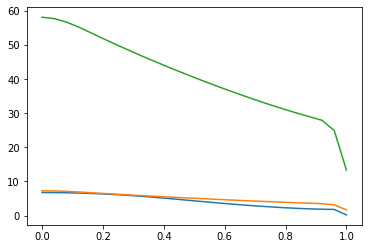

In [32]:
num_species = 3

species_dens_holder = np.zeros((3, int(len(density_profile)/3)))
species_temp_holder = np.zeros((3, int(len(temp_profile)/3)))

i = 0
j = 0
while i < int(len(density_profile)/3):
    for k in range(num_species):
        species_dens_holder[k, i] = density_profile[j]
        species_temp_holder[k, i] = temp_profile[j]
        j = j + 1
    i = i + 1
    


#print(species_dens_holder)
# print(species_temp_holder[1, :])
# print(species_temp_holder[2, :])

with open(f'./shots/{shot}/genray.in') as file:
    lines = file.readlines()

first_den_scale = True
first_tem_scale = True
for line in lines:
    if 'ndens' in line:
        ndens = int(line.split('=')[1].split('!')[0].strip())
        #print(ndens)
    if 'den_scale(3)' in line and first_den_scale == True:
        den_scale_3 = float(line.split('=')[1].split('!')[0].strip())
        first_den_scale = False
    if 'temp_scale(3)' in line and first_tem_scale == True:
         tem_scale_3 = float(line.split('=')[1].split('!')[0].strip())
         first_tem_scale = False       

genray_rho = np.linspace(0, 1, ndens)
#print(genray_rho)
print(den_scale_3)
# create interpolation functions

# density
genray_electron_density = interpolate.interp1d(genray_rho, species_dens_holder[0, :])
genray_deuteron_density = interpolate.interp1d(genray_rho, species_dens_holder[1, :])
genray_beam_density = interpolate.interp1d(genray_rho, species_dens_holder[2, :]*den_scale_3)

#temperature 
genray_electron_temp = interpolate.interp1d(genray_rho, species_temp_holder[0, :])
genray_deuteron_temp = interpolate.interp1d(genray_rho, species_temp_holder[1, :])
genray_beam_temp = interpolate.interp1d(genray_rho, species_temp_holder[2, :]*tem_scale_3)

print(genray_beam_density(genray_rho))
print(genray_deuteron_density(genray_rho))
print(genray_electron_density(genray_rho))

%matplotlib inline
plt.plot(genray_rho, species_temp_holder[0, :])
plt.plot(genray_rho, species_temp_holder[1, :])
plt.plot(genray_rho, genray_beam_temp(genray_rho))


In [37]:
with open(f'./shots/{shot}/aorsa2d.in', 'r') as file:
    lines = file.readlines()

for i in range(len(lines)):
    line = lines[i].strip()
    if len(line) == 0:
        continue
    if 'S_NRHO_N' in line:
        nrho_aorsa = int(line.split('=')[1].strip().strip(','))

    if 'S_RHO_N_GRID' in line:
        rho_aorsa = ''
        for k in range(21):
            rho_aorsa = rho_aorsa + lines[i + k + 1]

    if 'S_N_S' in line:

        edens = ''
        for k in range(21):
            edens = edens + lines[i + k + 1]

        Ddens = ''
        for k in range(21):
            Ddens = Ddens + lines[i + k + 1 + 23]

        Hdens = ''
        for k in range(21):
            Hdens = Hdens + lines[i + k + 1 + 23 + 23]

        beamdens = ''
        for k in range(21):
            beamdens = beamdens + lines[i + k + 1 +23 + 23 + 23]

        Cdens = ''
        for k in range(21):
            Cdens = Cdens + lines[i + k + 1 +23 + 23 + 23 + 23]
#print(rho_aorsa)
#print(Ddens)
#print(edens)

electron_density_aorsa = np.array(edens.split()).astype('float')
#print(electron_density_aorsa)
deuterium_density_aorsa = np.array(Ddens.split()).astype('float')

hydrogen_density_aorsa = np.array(Hdens.split()).astype('float')
#print(deuterium_density)
beam_density_aorsa = np.array(beamdens.split()).astype('float')
carbon_density_aorsa = np.array(Cdens.split()).astype('float')

rho_aorsa_array = np.array(rho_aorsa.split()).astype('float')


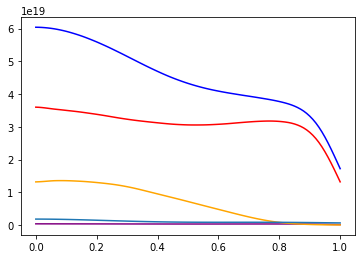

In [39]:
plt.plot(rho_aorsa_array, electron_density_aorsa, color='blue')
plt.plot(rho_aorsa_array,deuterium_density_aorsa, color='red')
plt.plot(rho_aorsa_array, hydrogen_density_aorsa, color='purple')
plt.plot(rho_aorsa_array, beam_density_aorsa, color='orange')
plt.plot(rho_aorsa_array, carbon_density_aorsa)

In [16]:
def get_aorsa_profile_string_from_array(array, num_columns):
    last_elec_dens = array[-1]
    # Reshape the array to have the desired number of columns
    reshaped_array = array[:-1].reshape(-1, num_columns)

    # Convert the reshaped array to a string with specified scientific notation formatting
    formatted_string = ""
    for row in reshaped_array:
        formatted_row = "  ".join(f"{value:.4e}" for value in row)
        formatted_string += formatted_row + "\n"
    formatted_string += f"{last_elec_dens:.4e}"

    return formatted_string

In [17]:
# density
touse_aorsa_electron_dens = genray_electron_density(rho_aorsa_array)
touse_aorsa_deuteron_dens = genray_deuteron_density(rho_aorsa_array)
touse_aorsa_beam_dens = genray_beam_density(rho_aorsa_array)

# temperature 
touse_aorsa_electron_temp = genray_electron_temp(rho_aorsa_array)
touse_aorsa_deuteron_temp = genray_deuteron_temp(rho_aorsa_array)
touse_aorsa_beam_temp = genray_beam_temp(rho_aorsa_array)


# Replace this with your actual numpy array

# density
touse_string_elec_dens = get_aorsa_profile_string_from_array(touse_aorsa_electron_dens, num_columns=5)
touse_string_deut_dens = get_aorsa_profile_string_from_array(touse_aorsa_deuteron_dens, num_columns=5)
touse_string_beam_dens = get_aorsa_profile_string_from_array(touse_aorsa_beam_dens, num_columns=5)

# temperature
touse_string_elec_temp = get_aorsa_profile_string_from_array(touse_aorsa_electron_temp, num_columns=5)
touse_string_deut_temp = get_aorsa_profile_string_from_array(touse_aorsa_deuteron_temp, num_columns=5)
touse_string_beam_temp = get_aorsa_profile_string_from_array(touse_aorsa_beam_temp, num_columns=5)

#print(touse_string_elec_dens)
print(touse_string_deut_temp)
#print(touse_string_beam_dens)

7.2538e+00  7.2416e+00  7.2293e+00  7.2171e+00  7.2048e+00
7.1728e+00  7.1408e+00  7.1088e+00  7.0768e+00  7.0316e+00
6.9863e+00  6.9410e+00  6.8957e+00  6.8437e+00  6.7917e+00
6.7397e+00  6.6877e+00  6.6350e+00  6.5824e+00  6.5297e+00
6.4771e+00  6.4258e+00  6.3744e+00  6.3231e+00  6.2718e+00
6.2218e+00  6.1718e+00  6.1217e+00  6.0717e+00  6.0228e+00
5.9740e+00  5.9252e+00  5.8763e+00  5.8286e+00  5.7809e+00
5.7332e+00  5.6855e+00  5.6389e+00  5.5923e+00  5.5457e+00
5.4991e+00  5.4536e+00  5.4080e+00  5.3625e+00  5.3170e+00
5.2725e+00  5.2280e+00  5.1835e+00  5.1391e+00  5.0956e+00
5.0522e+00  5.0087e+00  4.9653e+00  4.9229e+00  4.8805e+00
4.8381e+00  4.7957e+00  4.7543e+00  4.7130e+00  4.6716e+00
4.6303e+00  4.5900e+00  4.5498e+00  4.5095e+00  4.4693e+00
4.4302e+00  4.3910e+00  4.3519e+00  4.3128e+00  4.2749e+00
4.2369e+00  4.1990e+00  4.1611e+00  4.1244e+00  4.0878e+00
4.0511e+00  4.0145e+00  3.9793e+00  3.9440e+00  3.9088e+00
3.8736e+00  3.8399e+00  3.8062e+00  3.7725e+00  3.7388e+

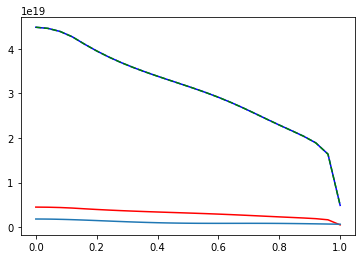

In [35]:
plt.plot(rho_aorsa_array, touse_aorsa_beam_dens, 'r')
plt.plot(rho_aorsa_array, touse_aorsa_electron_dens, 'blue')
plt.plot(rho_aorsa_array, touse_aorsa_deuteron_dens, color='green', linestyle='--')
plt.plot(rho_aorsa_array, carbon_density_aorsa)


In [43]:
Z_spec = [1, 1, 1, 6]

Z_eff = np.zeros_like(rho_aorsa_array)

for i in range(Z_eff.shape[0]):
    Z_eff[i] = (Z_spec[0]**2*touse_aorsa_deuteron_dens[i] + Z_spec[1]**2*hydrogen_density_aorsa[i] +\
                Z_spec[2]**2*touse_aorsa_beam_dens[i] + Z_spec[3]**2 * carbon_density_aorsa[i]) / touse_aorsa_electron_dens[i]
#print(Z_eff)

Z_eff_old = np.zeros_like(rho_aorsa_array)

for i in range(Z_eff_old.shape[0]):
    Z_eff_old[i] = (Z_spec[0]**2*deuterium_density_aorsa[i] + Z_spec[1]**2*hydrogen_density_aorsa[i] +\
                Z_spec[2]**2*beam_density_aorsa[i] + Z_spec[3]**2 * carbon_density_aorsa[i]) / touse_aorsa_electron_dens[i]
#print('--')
#print(Z_eff_old)

touse_Zeff = get_aorsa_profile_string_from_array(Z_eff, num_columns=5)
print(touse_Zeff)

2.5627e+00  2.5631e+00  2.5622e+00  2.5598e+00  2.5560e+00
2.5539e+00  2.5499e+00  2.5438e+00  2.5365e+00  2.5328e+00
2.5278e+00  2.5206e+00  2.5121e+00  2.5066e+00  2.5007e+00
2.4937e+00  2.4859e+00  2.4762e+00  2.4658e+00  2.4548e+00
2.4429e+00  2.4286e+00  2.4142e+00  2.4007e+00  2.3866e+00
2.3701e+00  2.3537e+00  2.3387e+00  2.3240e+00  2.3070e+00
2.2898e+00  2.2740e+00  2.2592e+00  2.2438e+00  2.2288e+00
2.2141e+00  2.2004e+00  2.1873e+00  2.1751e+00  2.1632e+00
2.1522e+00  2.1419e+00  2.1327e+00  2.1245e+00  2.1176e+00
2.1119e+00  2.1070e+00  2.1025e+00  2.0992e+00  2.0978e+00
2.0976e+00  2.0979e+00  2.0991e+00  2.1018e+00  2.1058e+00
2.1112e+00  2.1172e+00  2.1240e+00  2.1313e+00  2.1395e+00
2.1485e+00  2.1592e+00  2.1703e+00  2.1818e+00  2.1937e+00
2.2071e+00  2.2203e+00  2.2330e+00  2.2462e+00  2.2615e+00
2.2771e+00  2.2916e+00  2.3054e+00  2.3195e+00  2.3335e+00
2.3474e+00  2.3609e+00  2.3736e+00  2.3859e+00  2.3975e+00
2.4085e+00  2.4181e+00  2.4267e+00  2.4343e+00  2.4415e+

In [72]:

# load up the electron, deuteron, and beam density
list_elec_dens = touse_string_elec_dens.split('\n')
list_deut_dens = touse_string_deut_dens.split('\n')
list_beam_dens = touse_string_beam_dens.split('\n')

list_elec_temp = touse_string_elec_temp.split('\n')
list_deut_temp = touse_string_deut_temp.split('\n')
list_beam_temp = touse_string_beam_temp.split('\n')

list_Zeff = touse_Zeff.split('\n')



for i in range(len(lines)):
    line = lines[i].strip()
    if len(line) == 0:
        continue
    if 'S_N_S' in line:

        #electron density write to file 
        for k in range(21):
            lines[i + k + 1] = "     "+list_elec_dens[k]+"\n"

        #deuteron density write to file 
        for k in range(21):
            lines[i + k + 24] = "     "+list_deut_dens[k]+"\n"

        #deuteron density write to file 
        for k in range(21):
            lines[i + k + 24 + 23 + 23] = "     "+list_beam_dens[k]+"\n"

    if 'S_T_S' in line:

        #electron density write to file 
        for k in range(21):
            lines[i + k + 1] = "     "+list_elec_temp[k]+"\n"

        #deuteron density write to file 
        for k in range(21):
            lines[i + k + 24] = "     "+list_deut_temp[k]+"\n"

        #deuteron density write to file 
        for k in range(21):
            lines[i + k + 24 + 23 + 23] = "     "+list_beam_temp[k]+"\n"

    if 'S_ZEFF' in line:

        #electron density write to file 
        for k in range(21):
            lines[i + k + 1] = "     "+list_Zeff[k]+"\n"




In [73]:
# SAVE TO FILE
lineout = "".join(lines)       
with open(f'./shots/{shot}/aorsa2d_copy.in', 'w') as file:
    file.write(lineout)

In [23]:
print(touse_string_deut_dens.split('\n')[0])

4.486e+19  4.480e+19  4.473e+19  4.467e+19  4.461e+19


In [33]:
liney = 'hello dog cat 3'
'dog' in liney

True

In [25]:
testing = '1, 2, 3, 4, 5'
np.array(testing.split(',')).astype('float')

array([1., 2., 3., 4., 5.])